In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Plotting Utilities

In [77]:
def plot3D(px,py,pz,clist,emphPoints = [],cmap='plasma',title='',shadow=False, useCMAP = True,xLabel='',yLabel='',zLabel='',savefig='',saveN = 1, setRange = 0):
    
    elev = 30
    azim = 60

    viewVect = [np.cos(np.pi*180/elev)*np.sin(np.pi*180/azim),np.cos(np.pi*180/elev)*np.cos(np.pi*180/azim),np.cos(np.pi*180/elev)]
    
    thetalist = np.linspace(0,2*np.pi,saveN + 1)
    thetalist = thetalist[:-1]
    
    projMat = np.array([px,py])

    s = ''
    
    for idx in range(saveN):
        theta = thetalist[idx]
        rotMat = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
        
        rotx,roty = np.dot(rotMat,projMat)
        rotz = pz
        clistRot = clist
        
        p = np.array([rotx,roty,rotz])
        dots = np.array(np.dot(viewVect,p))
        sort = dots.argsort()

        fig, ax = plt.subplots(figsize = (10,10))
        
        ax.set_alpha(0)
        ax.axis('off')

        ax = fig.add_subplot(projection='3d')

        ax.patch.set_alpha(0)

        Xdist = px.max() - px.min()
        Xcntr = (px.max() + px.min())/2.0
        Ydist = py.max() - py.min()
        Ycntr = (py.max() + py.min())/2.0
        Zdist = pz.max() - pz.min()
        Zcntr = (pz.max() + pz.min())/2.0

        if setRange == 0:
            dist = 0.55*max(Xdist,Ydist,Zdist)
        else:
            dist = 0.55*setRange

        for p in emphPoints:
            ax.scatter([rotx[p]],[roty[p]],[rotz[p]],c='C1',s=200)
            if shadow:
                ax.scatter([rotx[p]],[roty[p]],[Zcntr - dist],c='black',alpha=0.5)
                ax.scatter([rotx[p]],[Ycntr + dist],[rotz[p]],c='black',alpha=0.5)
                ax.scatter([Xcntr - dist],[roty[p]],[rotz[p]],c='black',alpha=0.5)
        
        rotx = rotx[sort]
        roty = roty[sort]
        rotz = rotz[sort]
        clistRot = np.array(clistRot)[sort]
        
        if useCMAP:
            s = ax.scatter(rotx,roty,rotz,c=clistRot,s = 3, linewidth=0.2,cmap = cmap)
        else:
            s = ax.scatter(rotx,roty,rotz,c=clistRot,s = 3, linewidth=0.2)


        ax.set_xlim([Xcntr - dist, Xcntr + dist])
        ax.set_ylim([Ycntr - dist, Ycntr + dist])
        ax.set_zlim([Zcntr - dist, Zcntr + dist])

        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])

        #ax.set_axis_off()
        #plt.show()

        if shadow:
            #fig = plt.figure(figsize = (10,10))
            #ax = fig.gca(projection='3d')
            ax.view_init(30,-60)

            ax.scatter(rotx,roty,[Zcntr - dist for p in rotz],c='black',s=3, alpha=0.01)
            ax.scatter(rotx,[Ycntr + dist for p in roty],rotz,c='black',s=3,alpha=0.01)
            ax.scatter([Xcntr - dist for p in rotx],roty,rotz,c='black',s=3,alpha=0.01)

            ax.set_xlim([Xcntr - dist, Xcntr + dist])
            ax.set_ylim([Ycntr - dist, Ycntr + dist])
            ax.set_zlim([Zcntr - dist, Zcntr + dist])

            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_zticks([])

            #ax.set_axis_off()
        ax.set_xlabel(xLabel,fontsize=16)
        ax.set_ylabel(yLabel,fontsize=16)
        ax.set_zlabel(zLabel,fontsize=16)
        
        
        if title == '':
            pass
        else:
            plt.title(title,fontsize=30)

        if savefig == '':
            cb = plt.colorbar(s)
            plt.show()
        else:
            cb = plt.colorbar(s)
            plt.savefig(savefig+str(idx)+'.png')
            plt.close()
  
def trianglePlot(arry,clist,emphPoints = [],dim=2):  
  ranges = [arry[:,idx].max()-arry[:,idx].min() for idx in range(dim+1)]
  axesDist = 0.6*max(ranges)
  
  figs,axs = plt.subplots(nrows=dim,ncols=dim,figsize=(15,15))
  for row in range(dim-1,-1,-1):
      for col in range(dim-1,-1,-1):
          if col >= row:
              py = arry[:,row]
              px = arry[:,col+1]
              
              centerX = (px.max()+px.min())/2
              centerY = (py.max()+py.min())/2
              
              sc1 = axs[row,col].scatter(px,py,s=5,c=clist,edgecolor='black',linewidth=0.2, cmap='plasma')
              for p in emphPoints:
                  axs[row,col].scatter([px[0]],[py[0]],s=100,c='C1',edgecolor='black',linewidth=0.2)
              
              axs[row,col].set_xlim([centerX-axesDist,centerX+axesDist])
              axs[row,col].set_ylim([centerY-axesDist,centerY+axesDist])
              if row != col:
                  axs[row,col].set_xticks([])
                  axs[row,col].set_yticks([])
              if row == col:
                  axs[row,col].set_ylabel('direction '+str(row+1))
                  axs[row,col].set_xlabel('direction '+str(col+2))
                  
              axs[row,col].ticklabel_format(style='sci',scilimits=(-2,2),axis='both')
          else:
              axs[row,col].axis('off')
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.show()
    

### Clustering (Institutional Characteristics)

In [4]:
filepath = "../datasets/IPEDS_Dataset_Encoded/Institutional Characteristics/IC_2015-2021_data.csv"
institutional_chars = pd.read_csv(filepath, index_col=0, low_memory= False)


In [5]:
missing = institutional_chars.isna().sum()
missing /= institutional_chars.shape[0]
missing *=100
missing = missing.to_frame().rename(columns={0:'Percent Of Missing Values'})


In [6]:
institutional_chars.dropna(axis = 1, inplace = True)
institutional_chars.head()

,peo1istr,peo2istr,peo3istr,peo4istr,peo5istr,peo6istr,cntlaffi,pubprime,pubsecon,relaffil,...,assoc3,assoc4,assoc5,assoc6,sport1,confno1,sport2,sport3,sport4,year
unitid,,,,,,,,,,,,,,,,,,,,,
100654,Implied no,Yes,Implied no,Implied no,Implied no,Implied no,Public,State,Implied no,Not applicable,...,Implied no,Implied no,Implied no,Implied no,Yes,Southwestern Athletic Conference,Yes,Yes,Yes,2021
100663,Implied no,Yes,Yes,Implied no,Implied no,Implied no,Public,State,Implied no,Not applicable,...,Implied no,Implied no,Implied no,Implied no,Yes,Conference USA,Yes,Yes,Yes,2021
100690,Implied no,Yes,Implied no,Implied no,Implied no,Implied no,Private not-for-profit (religious affiliation),Not applicable,Not applicable,Churches of Christ,...,Implied no,Implied no,Implied no,Implied no,No,Not applicable,No,No,No,2021
100706,Implied no,Yes,Yes,Yes,Implied no,Implied no,Public,State,Implied no,Not applicable,...,Implied no,Implied no,Implied no,Implied no,No,Not applicable,Yes,Yes,Yes,2021
100724,Yes,Yes,Implied no,Implied no,Implied no,Yes,Public,State,Implied no,Not applicable,...,Implied no,Implied no,Implied no,Implied no,Yes,Southwestern Athletic Conference,Yes,Yes,Yes,2021


In [7]:
drop_columns = [c for c in institutional_chars.columns if institutional_chars[c].nunique() > 5]
pruned_institutional_chars = institutional_chars.drop(drop_columns, axis = 1)

In [8]:
pruned_institutional_chars.columns

Index(['peo1istr', 'peo2istr', 'peo3istr', 'peo4istr', 'peo5istr', 'peo6istr',
       'cntlaffi', 'level1', 'level2', 'level3', 'level4', 'level5', 'level6',
       'level7', 'level8', 'level12', 'level17', 'level18', 'level19', 'ft_ug',
       'ft_ftug', 'ftgdnidp', 'pt_ug', 'pt_ftug', 'ptgdnidp', 'docpp',
       'docppsp', 'openadmp', 'vet1', 'vet2', 'vet3', 'vet4', 'vet5',
       'credits1', 'credits2', 'credits3', 'credits4', 'slo5', 'slo51',
       'slo52', 'slo53', 'slo6', 'slo7', 'slo8', 'slo81', 'slo82', 'slo83',
       'slo9', 'stusrv1', 'stusrv2', 'stusrv3', 'stusrv4', 'stusrv8',
       'stusrv9', 'tuitpl', 'tuitpl1', 'tuitpl2', 'tuitpl3', 'tuitpl4',
       'dstnced1', 'dstnced2', 'dstnced3', 'distnced', 'disab', 'alloncam',
       'tuitvary', 'room', 'board', 'athassoc', 'assoc1', 'assoc2', 'assoc3',
       'assoc4', 'assoc5', 'assoc6', 'sport1', 'sport2', 'sport3', 'sport4'],
      dtype='object')

In [9]:
from prince import MCA

mca = MCA(n_components = 10, n_iter = 3, random_state = 101)
mca.fit(pruned_institutional_chars)
inst_chars_mca = mca.transform(pruned_institutional_chars)
inst_chars_mca.head()


,0,1,2,3,4,5,6,7,8,9
100654,-0.064932,-0.324822,0.712717,0.680602,-0.196434,0.003036,-0.008160,-0.019827,0.071194,0.017372
100663,-0.066357,-0.332046,0.827903,0.970389,-0.088646,0.003289,-0.003929,0.417252,-0.040441,-0.266409
100690,-0.052886,-0.213908,0.398985,-0.228401,0.488422,-0.007134,0.037315,-0.029341,-0.364206,0.250035
100706,-0.066514,-0.320926,0.764592,0.809643,-0.146024,0.002182,-0.002377,0.400736,-0.077567,-0.179038
100724,-0.063264,-0.304502,0.695659,0.755640,-0.088632,0.003428,-0.009632,0.260147,0.049318,-0.106100


In [10]:
inst_chars_mca.index.name = "unitid"

In [11]:
mca.explained_inertia_

[0.21460633176110797,
 0.17793787049221904,
 0.15190074281822802,
 0.06512731481471334,
 0.04151032388001643,
 0.03429842357170866,
 0.02861280459094703,
 0.020338826089658483,
 0.013701464288571035,
 0.012901664950861454]

#### Clustering

In [26]:
import numpy as np
from scipy import stats
inst_chars_mca_no_outliers = inst_chars_mca[(np.abs(stats.zscore(inst_chars_mca)) < 3).all(axis=1)]
X = inst_chars_mca_no_outliers.values

DBSCAN

In [39]:
from sklearn.cluster import DBSCAN
clusterer = DBSCAN(eps=0.2, min_samples=9)
yhat = clusterer.fit_predict(X)

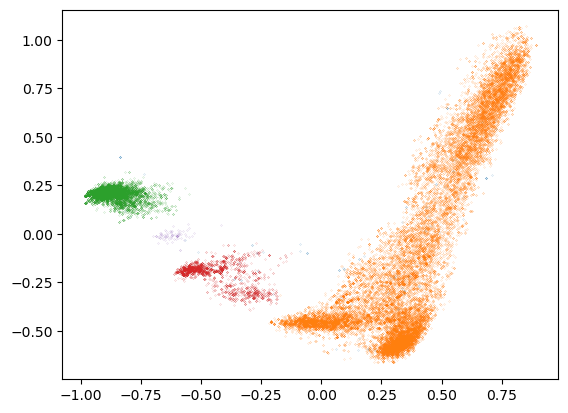

In [47]:
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
 
    plt.scatter(X[row_ix, 2], X[row_ix, 3], s = 0.01)

plt.show()

GMM

In [48]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=7)
yhat = gmm.fit_predict(X)

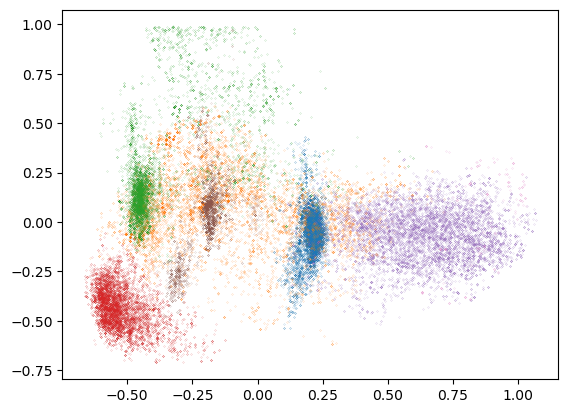

In [53]:
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    plt.scatter(X[row_ix, 3], X[row_ix, 4], s = 0.01)

plt.show()

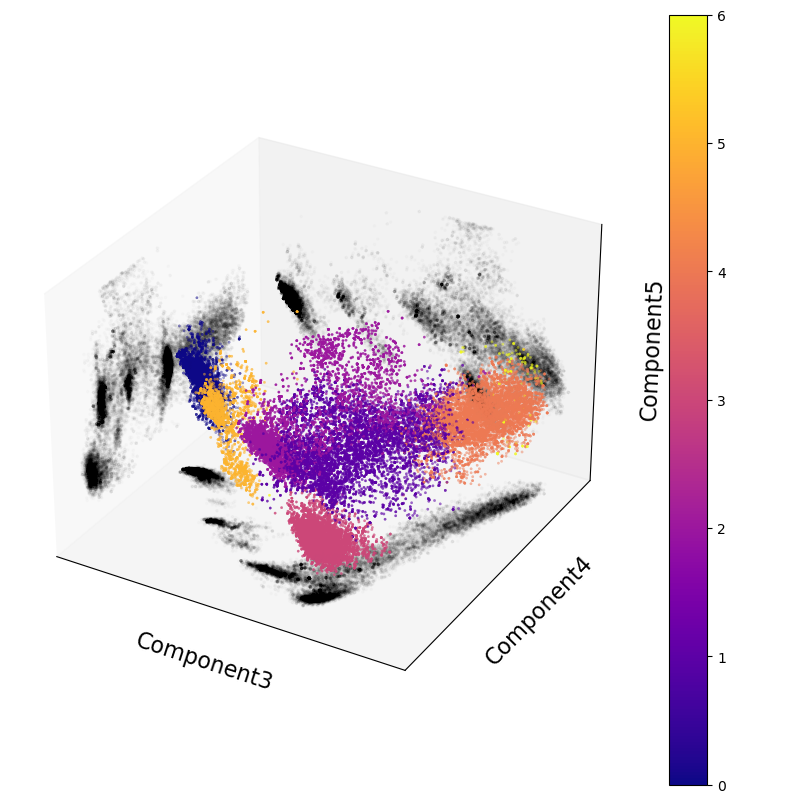

In [75]:
color = yhat

plot3D(X[:,2], X[:,3], X[:,4], color, shadow=True, xLabel = 'Component3', yLabel = 'Component4', zLabel = 'Component5')

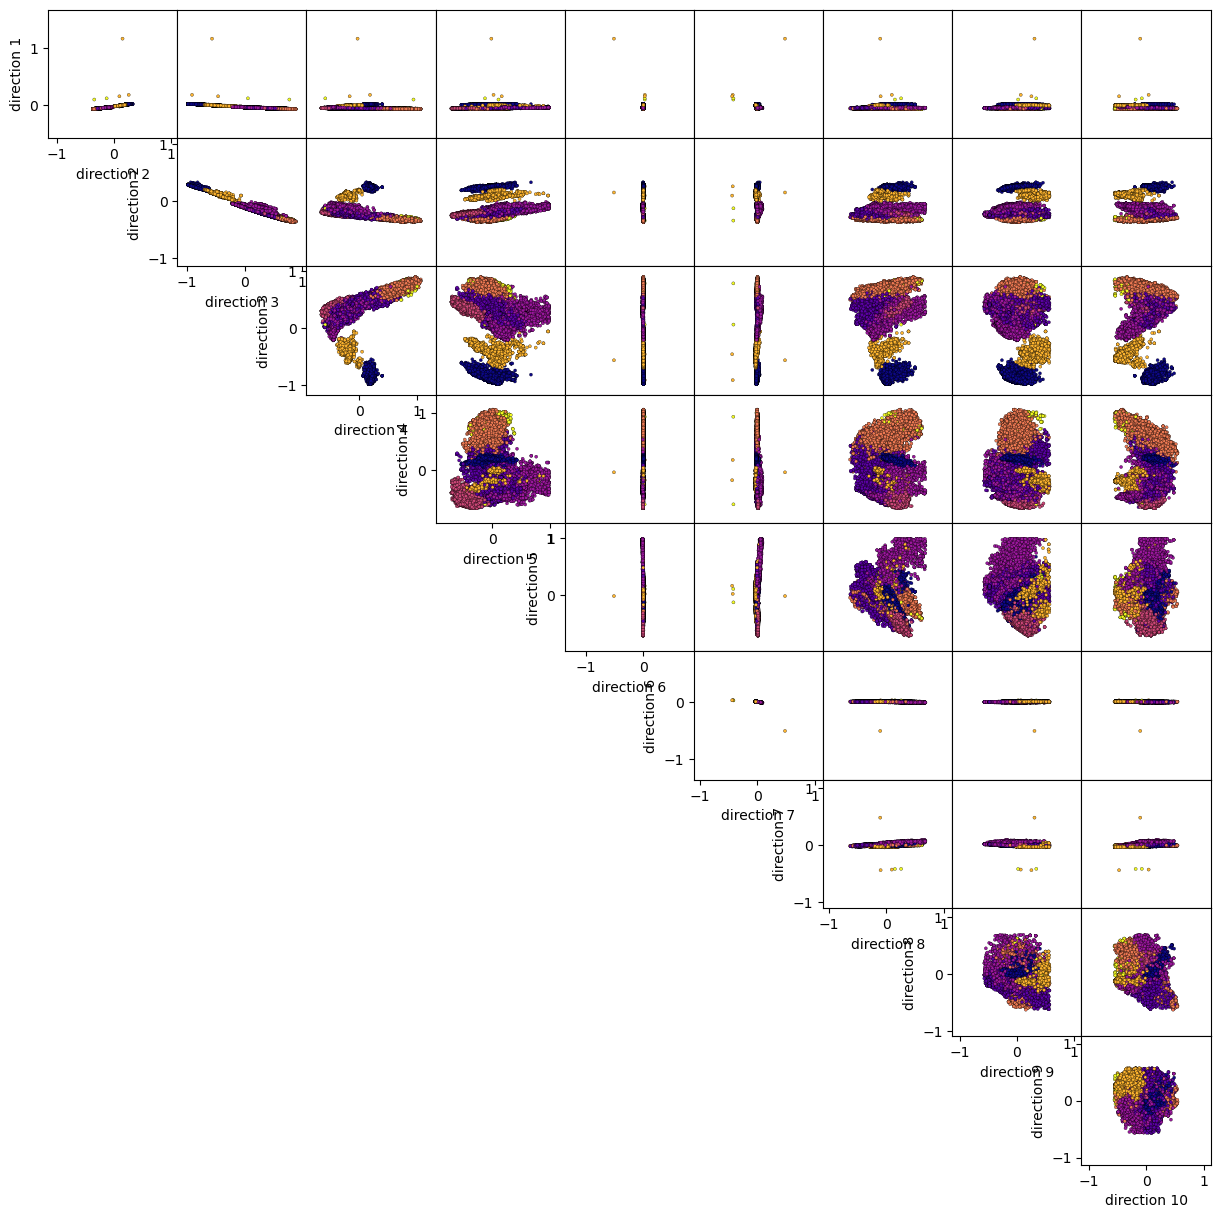

In [80]:
trianglePlot(arry = X, clist = color, dim = 9)

In [84]:
schools = inst_chars_mca_no_outliers.index
ic_cluster = yhat
ic_cluster_df = pd.DataFrame({"ic_cluster": ic_cluster}, index = schools) 

In [85]:
ic_cluster_df

,ic_cluster
unitid,
100654,4
100663,4
100690,2
100706,4
100724,4
...,...
487630,5
487649,2
487658,5


### Clustering (Institutional Finances)